<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week12_clustering(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **군집화**
## **K-평균 알고리즘 이해**

K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘이다. K-평균은 군집 중심점(Centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.

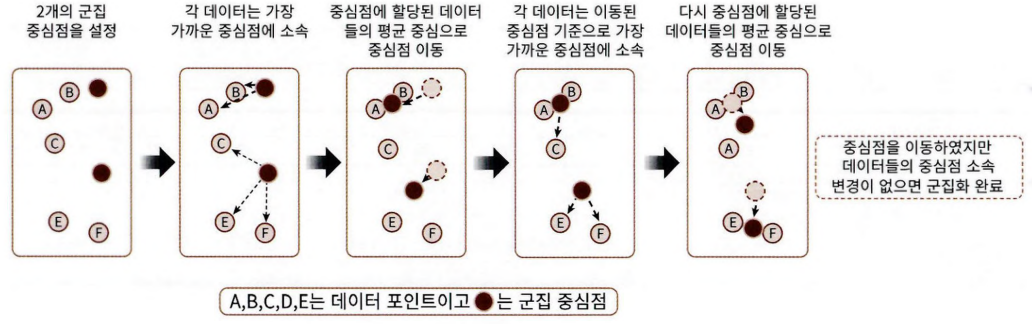

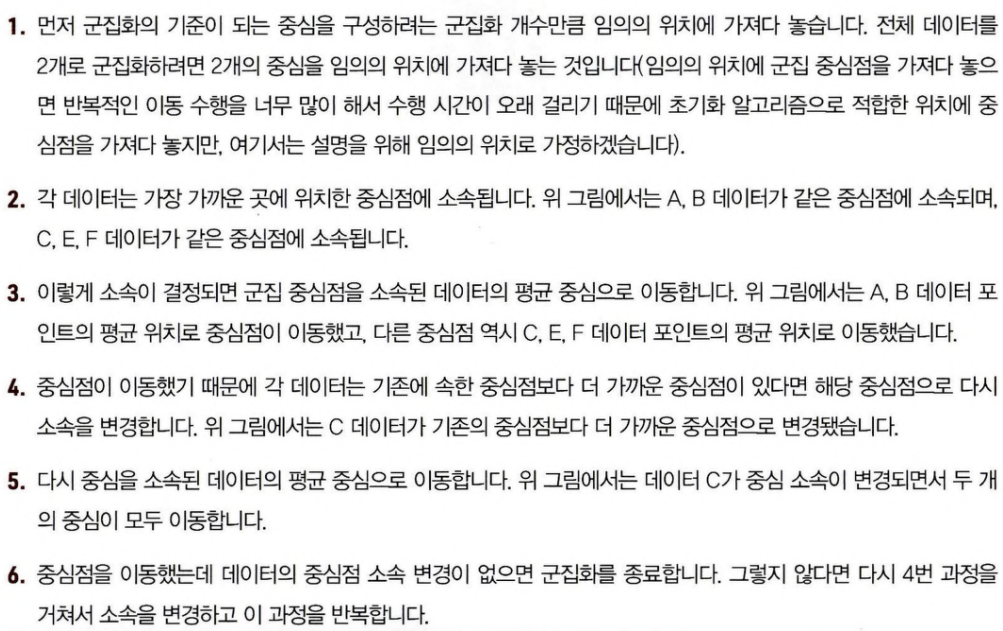

**K-평균의 장점**
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결하다

**K-평균의 단점**
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다
- 반복을 수행하는데, 반복 횟수가 많을 수록 수행 시간이 매우 느려진다.
- 몇 개의 군집을 선택해야 할지 가이드 하기가 어렵다

### **사이킷런 KMeans 클래스 소개**

사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. KMeans 클래스는 다음과 같은 초기화 파라미터를 가지고 있다.

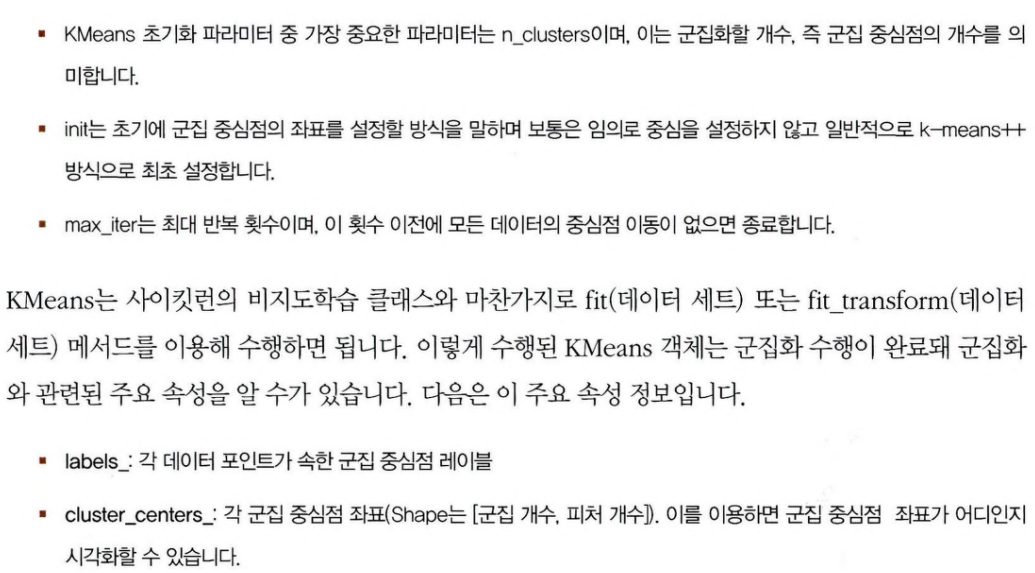

In [1]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300,
                tol=0.0001, random_state=None, copy_x=True, algorithm='auto')

### **K-평균을 이용한 붓꽃 데이터 세트 군집화**

붓꽃 데이터를 이용해 K-평균 군집화를 수행해본다.

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
 # 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                               'petal_length' ,'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화한다.

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

fit( )을 수행해 irisDF 데이터에 대한 군집화 수행 결과가 kmeans 객체 변수로 반환되었다. kmeans의 labels_ 속성값을 확인해 보면 irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있다.

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


labels_의 값이 0,1,2로 되어 있으며 이는 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미한다.

실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 되었는지 확읺애보자.

In [5]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


분류 타깃이 0값인 데이터는 모두 자 ㄹ그루핑 되었으며, target 1 값 데이터는 2개를 제외한 모두 0번 군집으로 그루핑 되었다. 하지만 Target 2값 데이터는 분산되어 그루핑 되었다.

이번에는 붓꽃 데이터 세트의 군집화를 시각화 해보자.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1 ]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


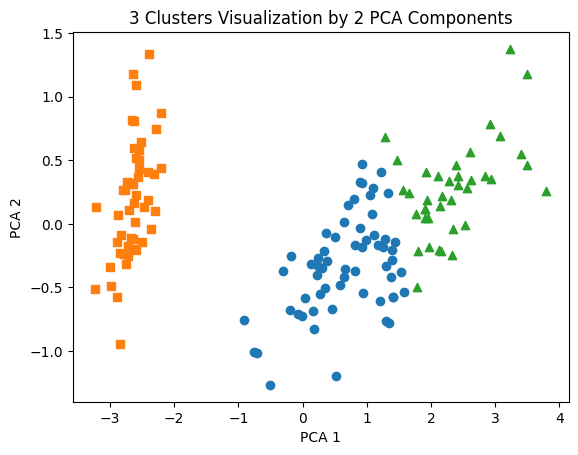

In [7]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster' ]==0].index
marker1_ind = irisDF[irisDF['cluster' ]==1].index
marker2_ind = irisDF[irisDF['cluster' ]==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pea스 값 추출. o, s, A 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

Cluster 1을 나타내는 네모는 명확히 다른 군집과 잘 분리되어 있다. Cluster 0을 나타내는 동그라미와 Cluster 2를 나타내는 세모는 상당 수준 분리되어 있지만 네모만큼 명확히 분리되어 있지는 않다.

### **군집화 알고리즘 테스트를 위한 데이터 생성**

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공한다. 대표적인 군집화용 데이터 생성기로는 make_blobs( )와 make_classification( ) API가 있다. 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데 하나의 클래스에 여러 개의 군집이 분포될 수 있기 데이터를 생성할 수 있다. make_blobs( )는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있으며, make_classification( )은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있따.

make_blobs( )을 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환된다. make_blobs( )의 호출 파라미터는 다음과 같다.

- n_samples: 생성할 총 데이터의 개수(default=100)
- n_features: 데이터의 피처 개수
- centersL: int 값
- cluster_std: 생성될 군집 데이터의 표준 편차



In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


피처 데이터 세트 X는 200개의 레코드와 2개의 피처르 ㄹ가지므로 shape은 (200,2) 군집 타깃 데이터 세트인 y의 shape은 (200,) 그리고 3개의 cluster의 값은 [0,1,2]이며 각각 67,67,66개로 균일하게 구성되어 있다. 가공을 편리하게 하기 위해 위 데이터 세트를 DataFrame으로 변경한다.

In [9]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


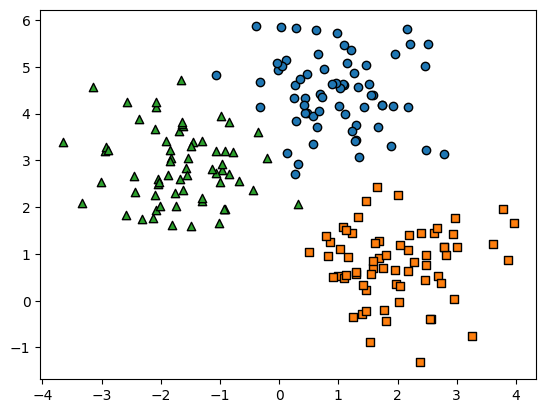

In [10]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's','^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 targetjist는 [0, 1, 2]
# target=0, target=1 z target=2 로 scatter plot을 marker별로 생성 .
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화 해보자.

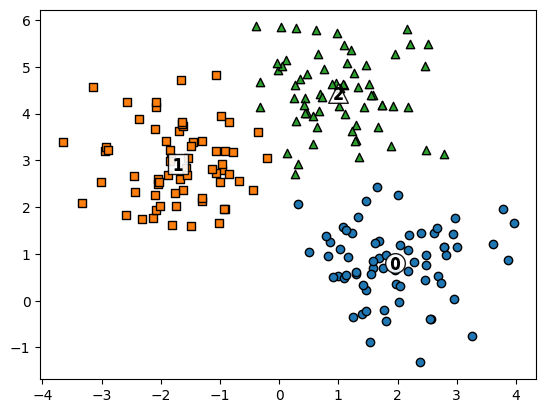

In [11]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF ['kmeans_label' ] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's','^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers [label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % label)
plt.show()


In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


target 0이 cluster 2로 target 1이 cluster 0으로 target 2가 cluster 1으로 대부분 잘 매핑되었다.

make_blobs( )은 cluster_std 파라미터로 데이터의 분포도를 조절한다. cluster_std가 작을 수록 군집 중심에 데이터가 모여 있으며 클수록 데이터가 펴져 있음을 알 수 있다.

## **군집 평가(Cluster Evaluation)**

대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블으 ㄹ가지고 있지 않다. 따라서, 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용한다.

### **실루엣 분석의 개요**

군집화 평가 방법으로 실루엣 분석이 있다. 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리 되어있는지를 나타낸다. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 떨어져 있을 것이다.
실루엣 분석은 실루엣 계수를 기반으로 한다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고, 다른 군집에 있는 데이터와는 얼마나 분리되어 있는지를 나타낸다.

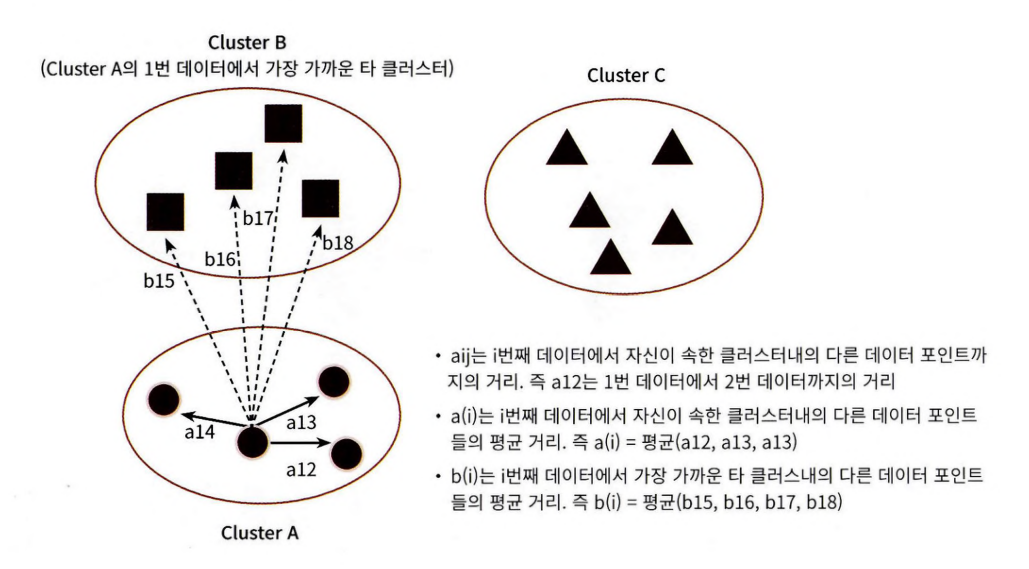

i번째 데이터 포인트의 실루엣 계수 값 s(i)는 다음과 같이 정의한다.

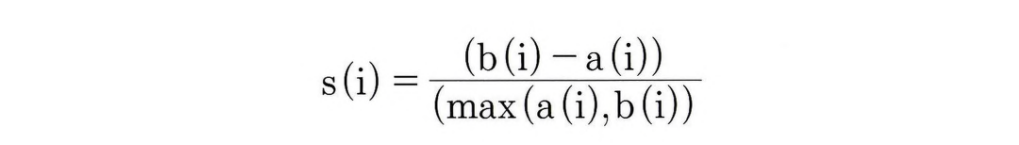

실루엣 계수는 -1에서 1 사이의 값을 가지며 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것이다. - 값은 아예 다른 군집에 데이터가 할당되었음을 의미한다.

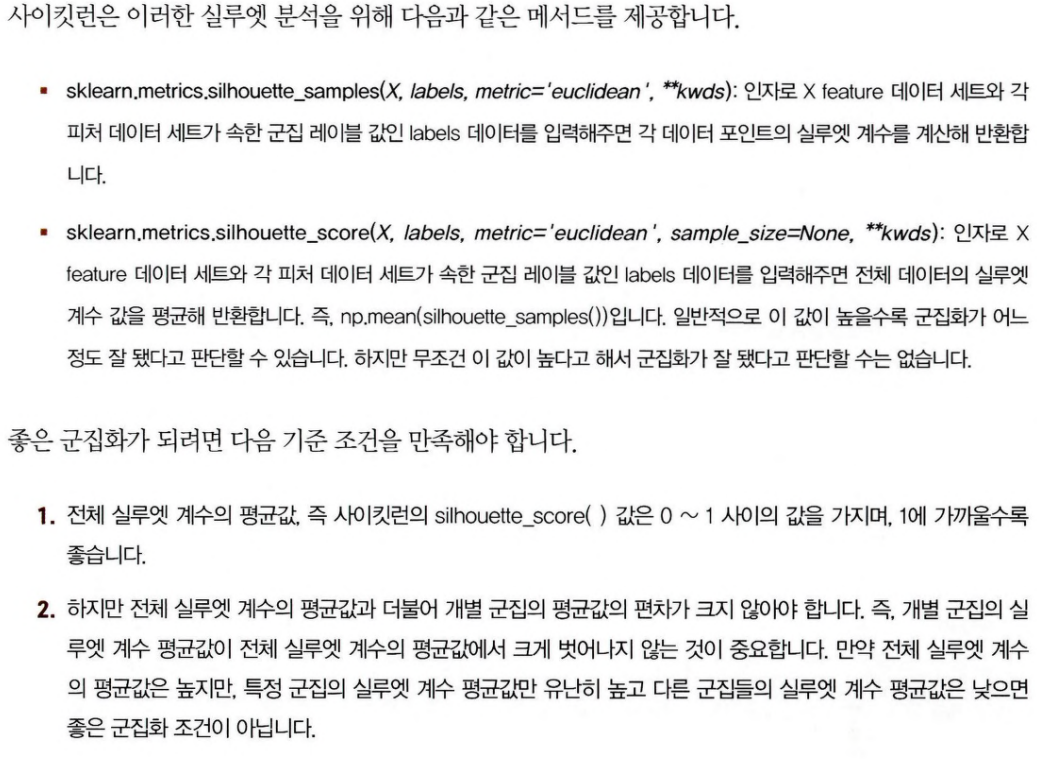

### **붓꽃 데이터 세트를 이용한 군집 평가**

In [13]:

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
 # 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF ['silhouette_coeff' ] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score：{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score：0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


붓꽃 데이터 세트의 평균 실루엣 계수 값은 0.553이다.

군집별 평균 실루엣 계수 값을 확인해보자.

In [14]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


## **군집 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼
수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너
무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균 의 적절한 군집개수가 설정됐다고 판단할 수 있다.

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def visualize_silhouette(cluster_list, X):
    from matplotlib import pyplot as plt

    for n_clusters in cluster_list:
        fig, ax1 = plt.subplots(1)
        fig.set_size_inches(6, 4)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = kmeans.fit_predict(X)

        silhouette_vals = silhouette_samples(X, cluster_labels)
        silhouette_avg = silhouette_score(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_silhouette_vals = silhouette_vals[cluster_labels == i]
            ith_silhouette_vals.sort()

            size_cluster_i = ith_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_silhouette_vals,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        plt.tight_layout()
        plt.show()

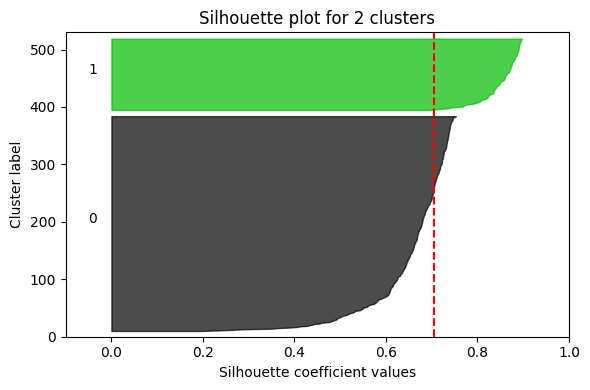

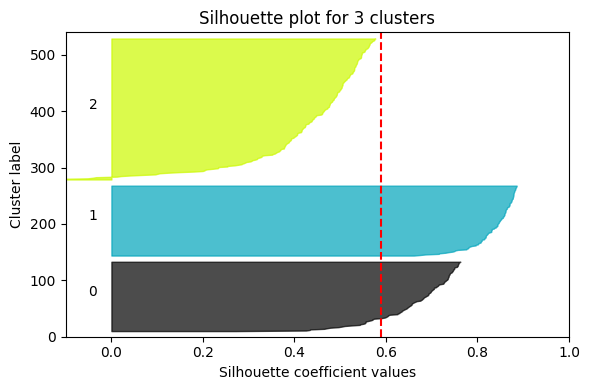

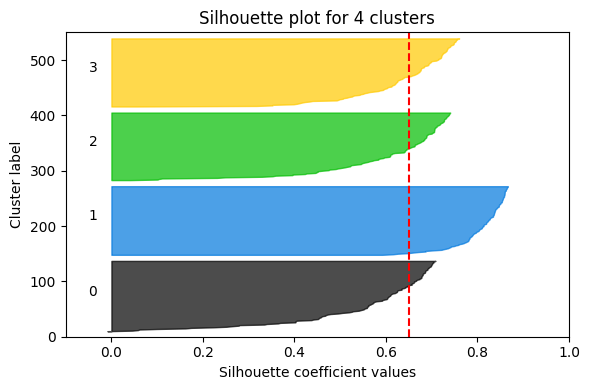

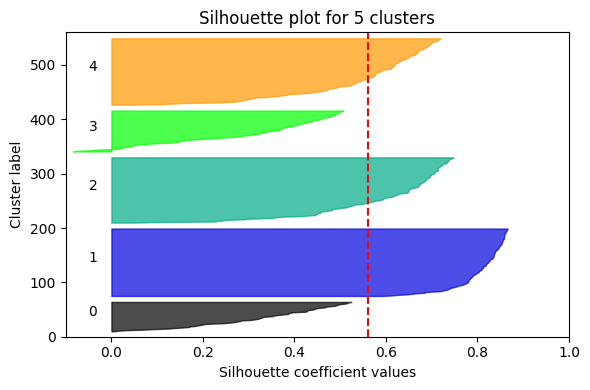

In [17]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
            center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때 군집 별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

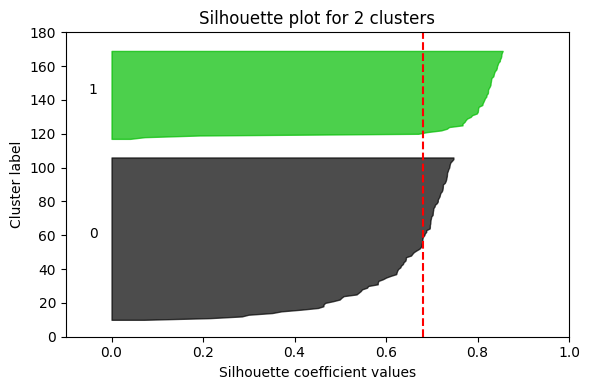

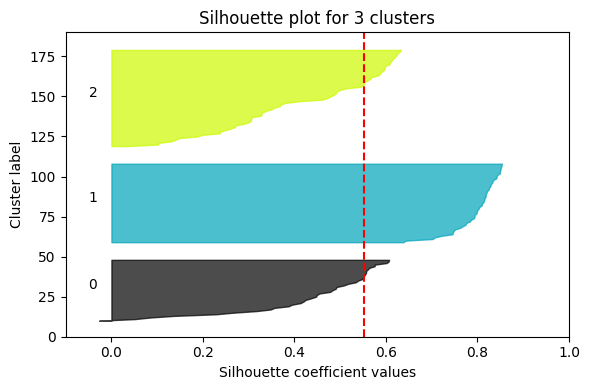

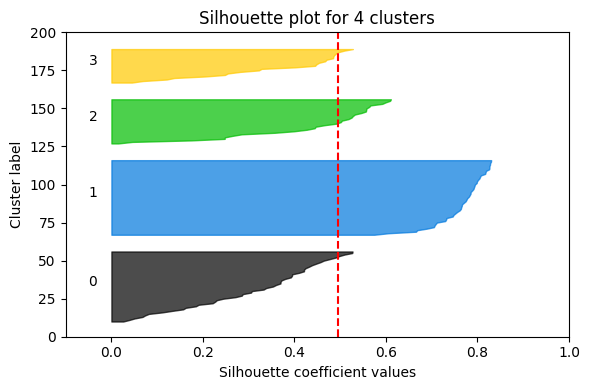

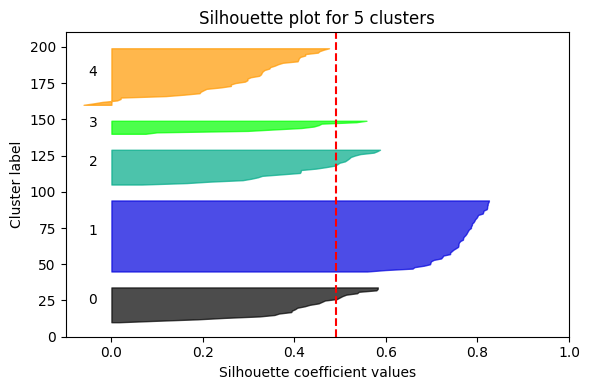

In [18]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)